In [1]:
import numpy as np
import gym
import random

In [2]:
env = gym.make('Taxi-v3')

state_size = env.observation_space.n
action_size = env.action_space.n
qtable = np.zeros((state_size, action_size))

learning_rate = 0.9
discount_rate = 0.8
epsilon = 1.0
decay_rate= 0.005

num_episodes = 1000
max_steps = 99

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
state_size

500

In [4]:
action_size

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


6

In [6]:
qtable

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


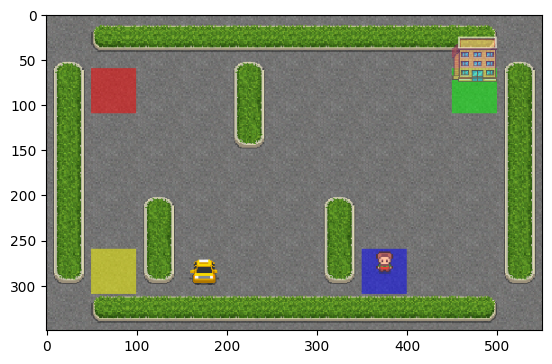

In [7]:
def env_reset()
  env.reset()
  import matplotlib.pyplot as plt
  screen = env.render(mode='rgb_array')
  plt.imshow(screen)

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


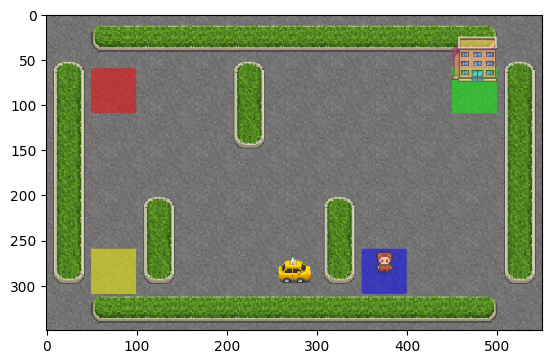

In [8]:
env.step(2)
screen = env.render(mode='rgb_array')
plt.imshow(screen)

In [10]:
f = env.step(2)
print(f)

(353, -1, False, {'prob': 1.0, 'action_mask': array([1, 1, 0, 1, 0, 0], dtype=int8)})


In [18]:
for episode in range(num_episodes):

  state = env.reset()
  done = False

  for s in range(max_steps):
    if random.uniform(0,1) < epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(qtable[state,:])
    new_state, reward, done, info = env.step(action)

    qtable[state,action] = qtable[state,action] + learning_rate * (reward + discount_rate * np.max(qtable[new_state,:])-qtable[state,action])

    state = new_state

    if done == True:
      break

  epsilon = np.exp(-decay_rate*episode)

  print(f"Training completed over {num_episodes} episodes")

Training completed over 1000 episodes
Training completed over 1000 episodes
Training completed over 1000 episodes
Training completed over 1000 episodes
Training completed over 1000 episodes
Training completed over 1000 episodes
Training completed over 1000 episodes
Training completed over 1000 episodes
Training completed over 1000 episodes
Training completed over 1000 episodes
Training completed over 1000 episodes
Training completed over 1000 episodes
Training completed over 1000 episodes
Training completed over 1000 episodes
Training completed over 1000 episodes
Training completed over 1000 episodes
Training completed over 1000 episodes
Training completed over 1000 episodes
Training completed over 1000 episodes
Training completed over 1000 episodes
Training completed over 1000 episodes
Training completed over 1000 episodes
Training completed over 1000 episodes
Training completed over 1000 episodes
Training completed over 1000 episodes
Training completed over 1000 episodes
Training com

In [35]:
state = env.reset()
done = False
rewards = 0

In [24]:
qtable

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [ -2.85251635,  -2.31564544,  -2.85251635,  -2.31564544,
         -1.6445568 , -11.31564544],
       [  0.24288   ,   1.5536    ,   0.24288   ,   1.5536    ,
          3.192     ,  -7.4464    ],
       ...,
       [  3.192     ,   5.24      ,   3.192     ,   1.5536    ,
         -5.808     ,  -5.808     ],
       [ -1.6445568 ,  -0.805696  ,  -1.64455682,  -0.805696  ,
        -10.6445568 , -10.6445568 ],
       [ 11.        ,   7.8       ,  11.        ,  15.        ,
          2.        ,   2.        ]])

In [25]:
state

146

In [26]:
np.argmax(qtable[state, :])

1

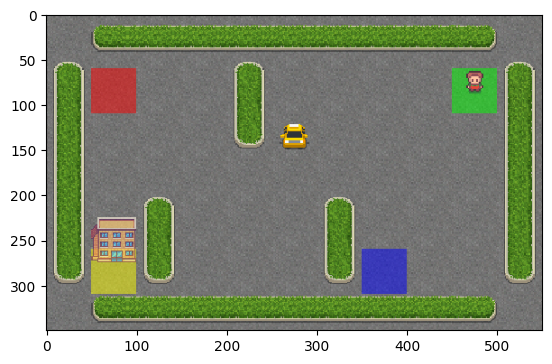

In [27]:
screen = env.render(mode='rgb_array')
plt.imshow(screen)

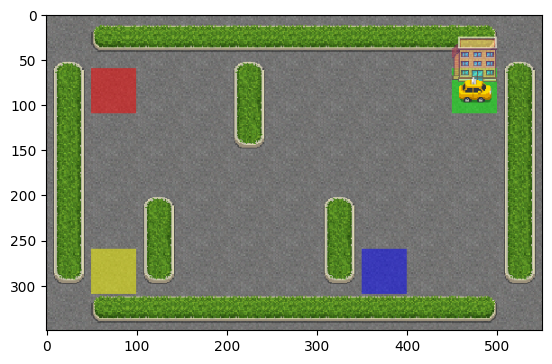

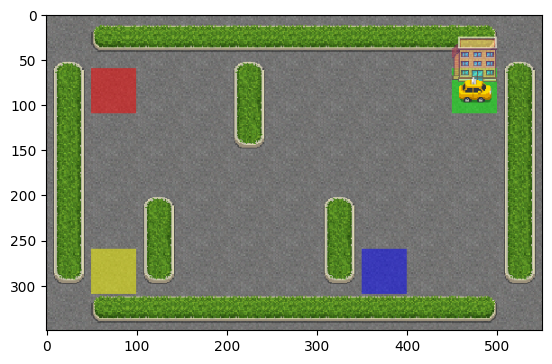

In [36]:
import time
from IPython import display as ipythondisplay

env_reset()

for s in range(max_steps):

  print(f"TRAINED AGENT")
  print("Step {}".format(s+1))
  screen = env.render(mode='rgb_array')
  plt.imshow(screen)

  action = np.argmax(qtable[state,:])
  new_state, reward, done, info = env.step(action)
  rewards += reward
  print(f"score: {rewards}")
  state = new_state


  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done == True:
      break
  time.sleep(0.2)
env.close()